# Import packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation

warnings.filterwarnings(action='ignore')

# Read dataset files

In [2]:

train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')
print(train_data.shape)
train_data.head()


(114, 11)


,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700


# Check missing data

In [3]:
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col


print("train data check")
missing_col = check_missing_col(train_data)
print("test data check")
check_missing_col(pd.read_csv('./data/test.csv'))

train data check
결측치가 있는 컬럼은: Sex입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 15 N (o/oo)입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 13 C (o/oo)입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.
test data check
결측치가 있는 컬럼은: Sex입니다
해당 컬럼에 총 6개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 15 N (o/oo)입니다
해당 컬럼에 총 9개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 13 C (o/oo)입니다
해당 컬럼에 총 8개의 결측치가 존재합니다.


[['Sex', dtype('O')],
 ['Delta 15 N (o/oo)', dtype('float64')],
 ['Delta 13 C (o/oo)', dtype('float64')]]

# Missing data
- missing data columns : 
     - Sex
     - Delta 15 N (o/oo)
     - Delta 13 C (o/oo)
- missing case 1 : 'Sex'
- missing case 2 : 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'
- missing case 3 : 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'

# How to process
- sex : set MALE
- 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)' : set mean value of all train data

# To do
- Sex : predict with
    - Species: 펭귄의 종을 나타내는 문자열
    - Island : 샘플들이 수집된 Palmer Station 근처 섬 이름
    - Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기
    - Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이
    - Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이
    - Flipper Length (mm) : 펭귄의 팔(날개) 길이
- Delta 15 N (o/oo), Delta 13 C (o/oo) : predict with
    - Sex : 펭귄의 성별
    - Species : 펭귄의 종을 나타내는 문자열
    - Island : 샘플들이 수집된 Palmer Station 근처 섬 이름
    - Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기
    - Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이
    - Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이
    - Flipper Length (mm) : 펭귄의 팔(날개) 길이

In [4]:
# to do
def processing_missing_data(data, missing_col):
    temp = data.copy()
    for col, dtype in missing_col:
        print(col)
        print(temp[temp[col].isna()][col])
        # Sex 결측치에 'MALE' 삽입
        if col=='Sex':
            temp.loc[:,col] = temp[col].fillna('MALE')
        # Delta 15 N (o/oo), Delta 13 C (o/oo) 결측치에 평균값 삽입
        elif dtype == int or dtype == float:
            temp.loc[:,col] = temp[col].fillna(temp[col].mean())
        #if(col=='Sex') temp[temp[col].isna()][col] = 'MALE'
        #temp[temp['col'].isna()][col] = 'MALE'
    return temp
train_data = processing_missing_data(train_data, missing_col)


Sex
6     NaN
8     NaN
70    NaN
Name: Sex, dtype: object
Delta 15 N (o/oo)
8     NaN
18    NaN
109   NaN
Name: Delta 15 N (o/oo), dtype: float64
Delta 13 C (o/oo)
8     NaN
18    NaN
109   NaN
Name: Delta 13 C (o/oo), dtype: float64


# Features of Label encoding
- Species: 펭귄의 종을 나타내는 문자열
  - Gentoo penguin (Pygoscelis papua)
  - Chinstrap penguin (Pygoscelis antarctica)
  - Adelie Penguin (Pygoscelis adeliae)
- Island : 샘플들이 수집된 Palmer Station 근처 섬 이름
  - Biscoe
  - Dream
  - Torgersen
- Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기
  - Yes : Full Clutch, 펭귄 둥지의 알이 2개
  - No : Not Full Clutch, 펭귄 둥지의 알이 2개가 아님
- Sex : 펭귄의 성별
  - MALE
  - FEMALE

# Label encoding to one-hot encoding

In [5]:
train_x = train_data.drop(['id', 'Body Mass (g)'], axis=1)
train_x = pd.get_dummies(train_x, columns= ['Species', 'Island', 'Clutch Completion', 'Sex'])
print(train_x.shape)
print(train_x)

train_y = train_data[['Body Mass (g)']]
print(train_y.shape)
print(train_y.head())

(114, 15)
     Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0                  50.0               15.3                  220   
1                  49.5               19.0                  200   
2                  45.1               14.4                  210   
3                  44.5               14.7                  214   
4                  49.6               16.0                  225   
..                  ...                ...                  ...   
109                36.6               17.8                  185   
110                39.2               18.6                  190   
111                43.2               18.5                  192   
112                46.9               16.6                  192   
113                50.8               17.3                  228   

     Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0             8.305150         -25.190170   
1             9.630740         -24.346840   
2             8.519510         -27.018540   
3    

In [21]:
model = Sequential()
model.add(Dense(640, input_dim=train_x.shape[1], activation='tanh'))
model.add(Dense(640))
model.add(Dense(1))
model.summary()
model.compile(optimizer='Nadam', loss='mse', metrics=['mse'])
hist = model.fit(train_x, train_y, epochs=1000, batch_size=128)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 640)               10240     
_________________________________________________________________
dense_18 (Dense)             (None, 640)               410240    
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 641       
Total params: 421,121
Trainable params: 421,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 19336244.0000 - mse: 19336244.0000
Epoch 2/1000
1/1 [==============================] - 0s 21ms/step - loss: 19152342.0000 - mse: 19152342.0000
Epoch 3/1000
1/1 [==============================] - 0s 23ms/step - loss: 19013790.0000 - mse: 19013790.0000
Epoch 4/1000
1/1 [==============================] - 0s 1

# Compare prediction to real data with train data

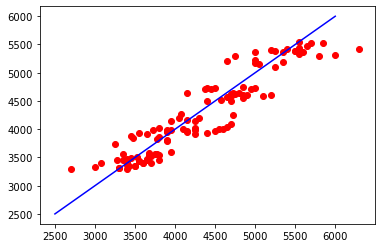

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(train_y, model.predict(train_x), 'ro')
plt.plot([2500, 6000], [2500, 6000], "b-")
plt.show()

In [23]:
#모델 평가하기
loss_and_metrics = model.evaluate(train_x, train_y, batch_size=128)
print('loss_and_metrics : ' + str(loss_and_metrics))

1/1 [==============================] - 0s 124ms/step - loss: 82098.5859 - mse: 82098.5859
loss_and_metrics : [82098.5859375, 82098.5859375]


In [24]:
test_data = pd.read_csv('./data/test.csv')

print("\nfirst missing\n")
missing_col = check_missing_col(test_data)
test_data = processing_missing_data(test_data, missing_col)
print("\nsecond missing\n")
missing_col = check_missing_col(test_data)


first missing

결측치가 있는 컬럼은: Sex입니다
해당 컬럼에 총 6개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 15 N (o/oo)입니다
해당 컬럼에 총 9개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 13 C (o/oo)입니다
해당 컬럼에 총 8개의 결측치가 존재합니다.
Sex
46     NaN
81     NaN
98     NaN
152    NaN
205    NaN
209    NaN
Name: Sex, dtype: object
Delta 15 N (o/oo)
27    NaN
75    NaN
81    NaN
106   NaN
159   NaN
175   NaN
202   NaN
205   NaN
215   NaN
Name: Delta 15 N (o/oo), dtype: float64
Delta 13 C (o/oo)
27    NaN
81    NaN
106   NaN
159   NaN
175   NaN
202   NaN
205   NaN
215   NaN
Name: Delta 13 C (o/oo), dtype: float64

second missing

결측치가 존재하지 않습니다


In [25]:

result = pd.DataFrame()
result['id'] = test_data['id']
test_x = test_data.drop(['id'], axis=1)
test_x = pd.get_dummies(test_x, columns= ['Species', 'Island', 'Clutch Completion', 'Sex'])
result['Body Mass (g)'] = model.predict(test_x)
print(model.predict(test_x).shape)
print(result)

(228, 1)
      id  Body Mass (g)
0      0    4070.385986
1      1    5476.182129
2      2    3389.171631
3      3    3485.599854
4      4    3419.013184
..   ...            ...
223  223    3975.864746
224  224    4624.700684
225  225    4723.325684
226  226    3931.894531
227  227    4113.269043

[228 rows x 2 columns]


In [26]:
result.to_csv('output.csv', index=False)